# **Problem Dataset Story**

## **business problem**

Within the scope of this notebook, according to the points given to the characteristics of the football players watched by the Scouts, predictions will be made as to which class (average, highlighted) players they are.

## **Diabetes Prediction**

The data set consists of information containing the characteristics and scores of the football players evaluated by the scouts according to the characteristics of the football players observed in the matches from Scoutium.

scoutium_attributes.csv Variables;

* task_response_id
* match_id
* evaluator_id
* player_id
* position_id
* analysis_id
* attribute_id
* attribute_value

In this data set, the **'task_response_id'** variable indicates the set of a scout's evaluations of all players on a team's roster in a match.

**'match_id'** variable is a variable that represents the match number

**'evaluator_id'** is the variable indicating the evaluator's (scout) number.

**'player_id'** is the variable that represents the player's number.

**'position_id'** shows the number of the position played by the relevant player in that match.

1: Goalkeeper

2: Centre-Back

3: Right-Back

4: Left Back

5: Center Defensive Midfielder

6: Central Midfielder

7: Right Forward

8: Left Forward

9: Center Attacking Midfielder

10: Striker

**'analysis_id'** is a variable that specifies the set containing a scout's attribute evaluations of a player in a match.

**'attribute_id'** is a variable that represents the number of each attribute by which players are evaluated

**'attribute_value'** is a variable that shows the value (point) a scout gives to an attribute of a player.

scoutium_potential_labels.csv Variables;

* task_response_id

* match_id

* evaluator_id

* player_id

* potential_label

In this data set, the **'task_response_id'** variable indicates the set of a scout's evaluations of all players on a team's roster in a match.

**'match_id'** variable is a variable that represents the match number

**'evaluator_id'** is the variable indicating the evaluator's (scout) number.

**'player_id'** is the variable that represents the player's number.

**'potential_label'** is a variable that indicates a scout's final decision on a player in a match. This is a target variable.

## **Preparation**

Let's start by including our necessary libraries to clean, process and visualize data.

In [69]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**NumPy;** It is a basic library for scientific computing in Python.

**Pandas;** It is a Python library used for data analysis and data manipulation.

**Matplotlib;** It is the basic library for data visualization in Python. It is used to create line charts, bar charts, histograms, scatter plots and more.

**Seaborn;** It is a visualization library built on Matplotlib. It provides higher levels of abstraction to create more advanced and aesthetically pleasing plots than Matplotlib.

To avoid seeing some "warning" outputs;

In [70]:
warnings.filterwarnings(action='ignore')

Let's set certain display options using the Pandas library.

In [71]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

The following Python code reads data from CSV files named "scoutium_attributes.csv" and "scoutium_potential_labels.csv" and converts it to a Pandas DataFrame:

In [72]:
from google.colab import drive
drive.mount('/content/drive')

df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/scoutium_attributes.csv", sep=";")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/scoutium_potential_labels.csv", sep=";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **EDA - Exploratory Data Analysis**

Exploratory Data Analysis is the general name for analyzes performed to understand, summarize and gain insight from data. The main goal of Exploratory Data Analysis is to develop a general understanding of the data and be able to make more informed decisions throughout the rest of the analytical process.

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10730 entries, 0 to 10729
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   task_response_id  10730 non-null  int64  
 1   match_id          10730 non-null  int64  
 2   evaluator_id      10730 non-null  int64  
 3   player_id         10730 non-null  int64  
 4   position_id       10730 non-null  int64  
 5   analysis_id       10730 non-null  int64  
 6   attribute_id      10730 non-null  int64  
 7   attribute_value   10730 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 670.8 KB


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   task_response_id  322 non-null    int64 
 1   match_id          322 non-null    int64 
 2   evaluator_id      322 non-null    int64 
 3   player_id         322 non-null    int64 
 4   potential_label   322 non-null    object
dtypes: int64(4), object(1)
memory usage: 12.7+ KB


In [56]:
df1.shape

(10730, 8)

In [57]:
df2.shape

(322, 5)

In [58]:
df1.columns

Index(['task_response_id', 'match_id', 'evaluator_id', 'player_id', 'position_id', 'analysis_id', 'attribute_id', 'attribute_value'], dtype='object')

In [59]:
df2.columns

Index(['task_response_id', 'match_id', 'evaluator_id', 'player_id', 'potential_label'], dtype='object')

In [60]:
df1.isnull().sum()

task_response_id    0
match_id            0
evaluator_id        0
player_id           0
position_id         0
analysis_id         0
attribute_id        0
attribute_value     0
dtype: int64

In [61]:
df2.isnull().sum()

task_response_id    0
match_id            0
evaluator_id        0
player_id           0
potential_label     0
dtype: int64

## **Data Pre-Processing**

Data preprocessing steps are the processes performed to prepare raw data for analysis or modeling. Raw data can often be incomplete, noisy, inconsistent or inaccurate and cannot be used directly for analysis or machine learning models. Therefore, the data preprocessing step is a critical step in the machine learning process by improving the quality of the data and making it suitable for analysis.

Let's combine the two data sets we have through 4 variables: *"task_response_id"*, *'match_id'*, *'evaluator_id'* and *"player_id"*. And then let's try to understand our combined dataset

In [74]:
merged_df = pd.merge(df1, df2, on=["task_response_id", "match_id", "evaluator_id", "player_id"], how='inner')

In [75]:
merged_df.shape

(10730, 9)

In [76]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10730 entries, 0 to 10729
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   task_response_id  10730 non-null  int64  
 1   match_id          10730 non-null  int64  
 2   evaluator_id      10730 non-null  int64  
 3   player_id         10730 non-null  int64  
 4   position_id       10730 non-null  int64  
 5   analysis_id       10730 non-null  int64  
 6   attribute_id      10730 non-null  int64  
 7   attribute_value   10730 non-null  float64
 8   potential_label   10730 non-null  object 
dtypes: float64(1), int64(7), object(1)
memory usage: 754.6+ KB


In [65]:
merged_df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.000,average
1,4915,62935,177676,1361061,2,12818495,4323,56.000,average
2,4915,62935,177676,1361061,2,12818495,4324,67.000,average
3,4915,62935,177676,1361061,2,12818495,4325,56.000,average
4,4915,62935,177676,1361061,2,12818495,4326,45.000,average


In [66]:
merged_df.tail()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
10725,5642,63032,151191,1909728,7,12825756,4357,67.000,highlighted
10726,5642,63032,151191,1909728,7,12825756,4407,78.000,highlighted
10727,5642,63032,151191,1909728,7,12825756,4408,67.000,highlighted
10728,5642,63032,151191,1909728,7,12825756,4423,67.000,highlighted
10729,5642,63032,151191,1909728,7,12825756,4426,78.000,highlighted


In [67]:
print(merged_df["potential_label"].value_counts())

potential_label
average          8497
highlighted      2097
below_average     136
Name: count, dtype: int64


In [68]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
task_response_id,10730.000,5252.082,268.254,4915.000,4997.000,5162.000,5524.000,5642.000
match_id,10730.000,63199.764,663.917,60549.000,62988.000,63166.000,63627.000,64045.000
evaluator_id,10730.000,175246.880,43667.459,130478.000,151191.000,151191.000,177676.000,256441.000
player_id,10730.000,1525548.486,201751.875,1355710.000,1367783.000,1372670.000,1719053.000,1909728.000
position_id,10730.000,5.347,2.861,1.000,3.000,6.000,8.000,10.000
analysis_id,10730.000,12822388.800,2676.866,12818481.000,12819582.000,12822231.000,12825047.000,12825764.000
attribute_id,10730.000,4348.609,26.980,4322.000,4330.000,4342.000,4353.000,4426.000
attribute_value,10730.000,55.271,16.048,1.000,45.000,56.000,67.000,100.000


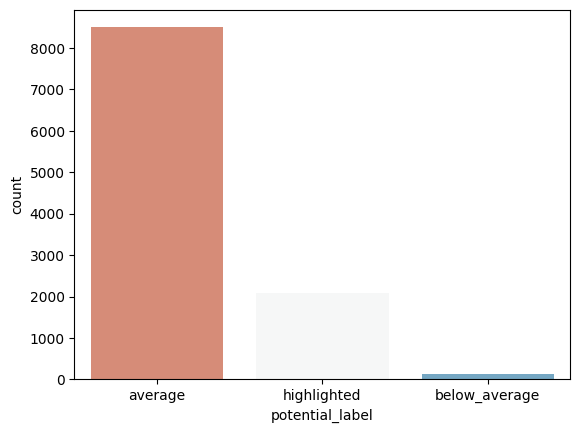

In [20]:
sns.countplot(x="potential_label", data=merged_df, palette='RdBu')
plt.show()

In [21]:
import plotly.graph_objects as go
colors = ['green', 'orange', 'blue']
labels = ['average','highlighted', 'below_average']
values = merged_df['potential_label'].value_counts()/merged_df['potential_label'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=40,
                  marker=dict(colors=colors, line=dict(color='black', width=5)))
fig.update_layout(
    title_text="potential_label")
fig.show()

In [22]:
100*merged_df["potential_label"].value_counts()/len(merged_df)

potential_label
average         79.189
highlighted     19.543
below_average    1.267
Name: count, dtype: float64

Once we understand our combined dataset, let's remove the keeper (1) class in 'position_id' from our dataset

In [23]:
merged_df = merged_df[merged_df['position_id'] != 1]

We prefer to remove the below_average class in 'potential_label' in our dataset from the dataset. Because the below_average class accounts for 1% of the entire dataset.

In [24]:
merged_df = merged_df[merged_df['potential_label'] != 'below_average']

At this stage we want to talk about **pivot tables**. Pivot tables are tables used to summarize and analyze large and complex data sets. It allows rearranging data and calculating various summary statistics (sum, average, count, etc.). Pivot tables are useful for quickly understanding and analyzing data.

**So, why are pivot tables created?**

Pivot tables are used to summarize data in large data sets and see key information quickly. This makes it easier to make sense of the data and identify important patterns or trends. However, it helps analyze data by dividing it into certain categories or groups. It also allows quick calculation of summary statistics such as total, average, and count on the data. Ultimately, pivot tables simplify the reporting process by presenting data in a visually appealing and understandable format.

In [25]:
pivot_df = merged_df.pivot_table(
    index=['player_id', 'position_id', 'potential_label'],
    columns='attribute_id',
    values='attribute_value',
    aggfunc='mean'  # Aynı player_id ve attribute_id için ortalama değeri alır
)

Now let's examine our pivot table. Let's create a table using the “pivot_table” function from the data set we created. Let's manipulate this pivot table so that there is one player in each row. Then, let's create the pivot table with "player_id", "position_id" and "potential_label" in the index, "attribute_id" in the columns, and "attribute_value" as the values ​​given by the scouts to the players.

In [26]:
pivot_df_reset = pivot_df.reset_index()

In [27]:
pivot_df_reset.columns = [str(col) for col in pivot_df_reset.columns]

In [28]:
pivot_df_reset

,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.500,50.500,34.000,50.500,45.000,45.000,45.000,45.000,50.500,56.000,39.500,34.000,39.500,39.500,45.000,45.000,50.500,28.500,23.000,39.500,28.500,28.500,45.000,50.500,56.000,34.000,39.500,50.500,34.000,34.000,56.000,34.000,34.000,56.000
1,1356362,9,average,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,56.000,67.000,67.000,56.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,67.000,67.000,56.000,78.000
2,1356375,3,average,67.000,67.000,67.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,78.000,56.000,67.000,67.000,67.000,67.000,67.000,56.000,56.000,67.000,67.000,56.000,56.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,67.000,67.000,56.000,78.000
3,1356375,4,average,67.000,78.000,67.000,67.000,67.000,78.000,78.000,78.000,56.000,67.000,67.000,67.000,78.000,78.000,56.000,67.000,67.000,45.000,45.000,56.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,56.000,67.000,56.000,67.000,45.000,56.000
4,1356411,9,average,67.000,67.000,78.000,78.000,67.000,67.000,67.000,67.000,89.000,78.000,67.000,67.000,67.000,56.000,56.000,67.000,78.000,56.000,56.000,67.000,56.000,67.000,56.000,67.000,67.000,56.000,67.000,67.000,56.000,67.000,89.000,56.000,67.000,78.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1907347,5,average,67.000,78.000,78.000,56.000,78.000,67.000,78.000,67.000,56.000,78.000,78.000,56.000,67.000,67.000,78.000,56.000,67.000,56.000,56.000,67.000,78.000,89.000,67.000,78.000,67.000,67.000,67.000,67.000,56.000,67.000,78.000,78.000,78.000,56.000
267,1907347,6,average,67.000,67.000,67.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,78.000,56.000,67.000,67.000,67.000,67.000,78.000,67.000,56.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,67.000,67.000,67.000,78.000
268,1909532,10,average,56.000,45.000,45.000,45.000,56.000,56.000,56.000,56.000,23.000,23.000,34.000,45.000,56.000,34.000,23.000,45.000,45.000,23.000,23.000,34.000,23.000,23.000,34.000,23.000,45.000,45.000,56.000,34.000,34.000,56.000,34.000,34.000,34.000,23.000
269,1909724,2,highlighted,78.000,78.000,78.000,78.000,78.000,78.000,78.000,78.000,67.000,67.000,78.000,78.000,78.000,67.000,78.000,67.000,78.000,56.000,56.000,78.000,78.000,67.000,78.000,78.000,78.000,78.000,78.000,67.000,67.000,67.000,78.000,78.000,67.000,78.000


Now it's time for **standardization**. **Scaling**; In the field of machine learning and data analysis, it is the process of fitting the values of different features of data to a specific range or distribution. In particular, scaling is important when different attributes (e.g., age, income, height, weight, etc.) have different units of measurement or ranges of values are significantly different. Directly using features at different scales can cause machine learning models to produce inaccurate results.

**Standardization processes** are very important in both linear and distance-based methods and methods using gradient descent. We perform variable standardization processes to ensure that the models approach the variables equally and to ensure that the parameter estimation methods used make faster and more accurate predictions.

Let's express the "potential_label" categories (average, highlighted) numerically using the Label Encoder function.

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
pivot_df_reset['potential_label'] = label_encoder.fit_transform(pivot_df_reset['potential_label'])

Let's assign the numeric variable columns to a list named "num_cols" and apply **StandardScaler** to scale the data in all the "num_cols" variables we saved.

In [30]:
num_cols = pivot_df_reset.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pivot_df_reset[num_cols] = scaler.fit_transform(pivot_df_reset[num_cols])

Let's use **histogram graphics** to examine our numerical variables.

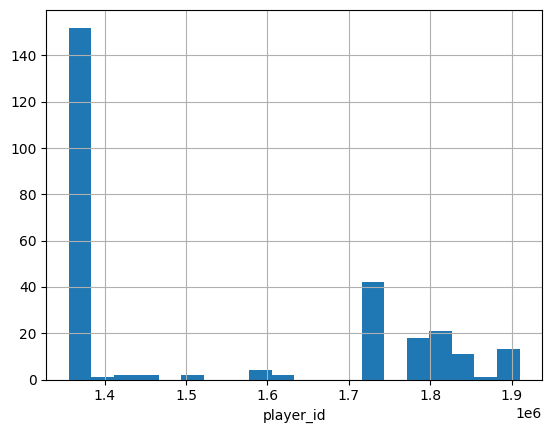

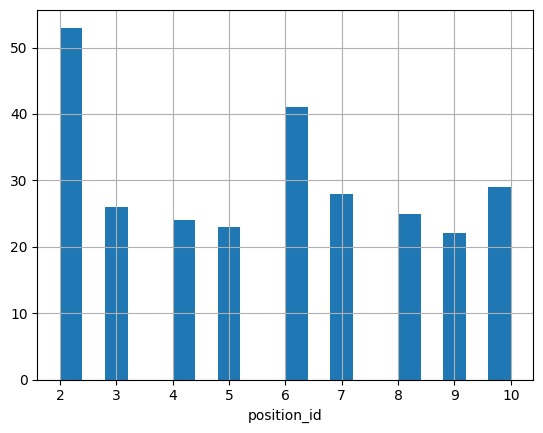

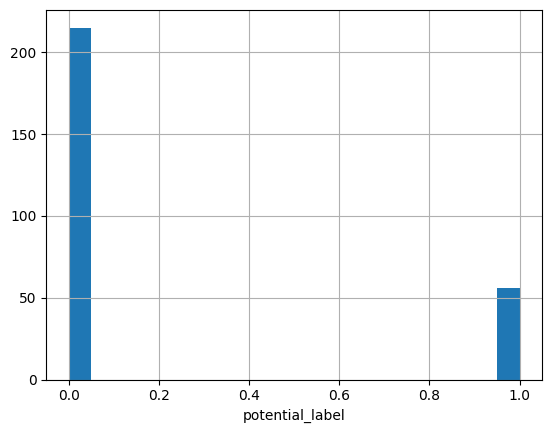

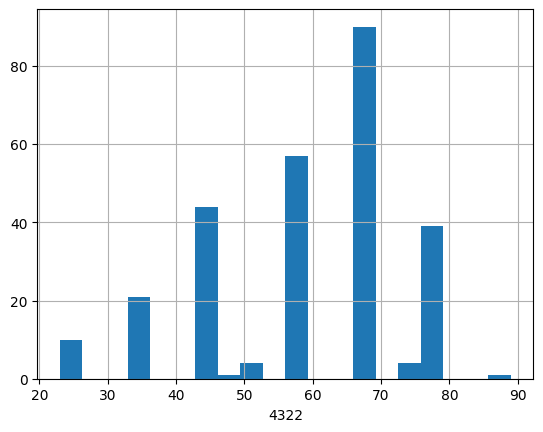

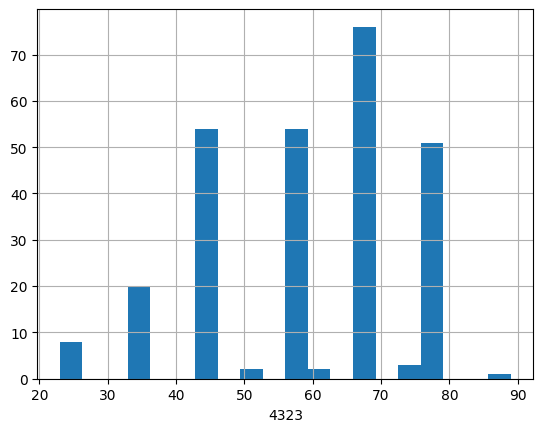

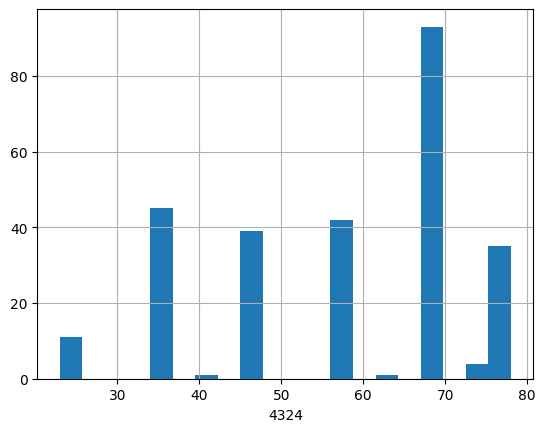

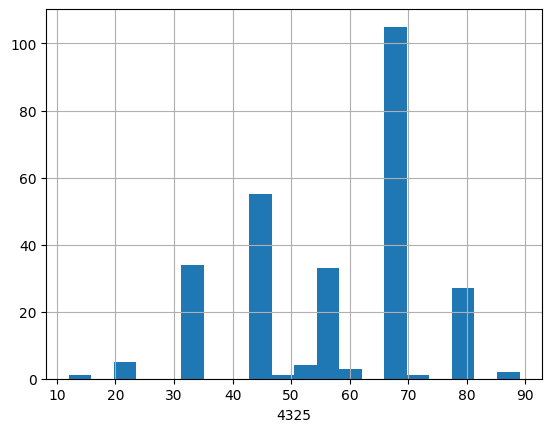

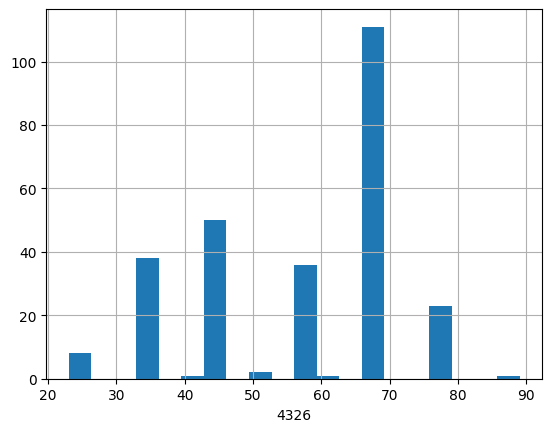

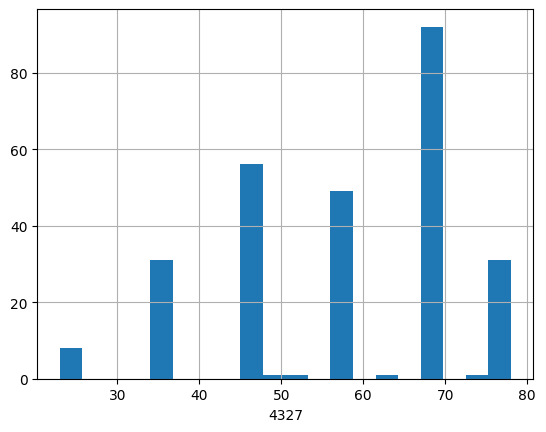

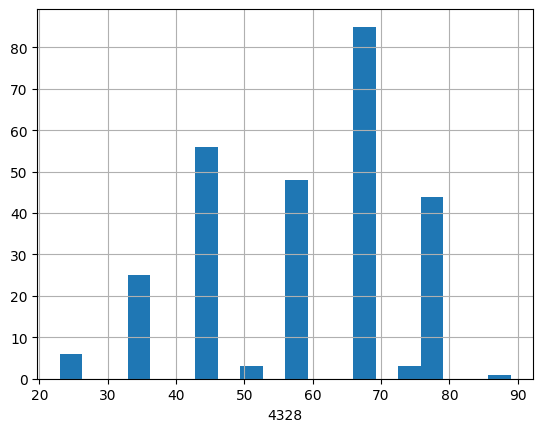

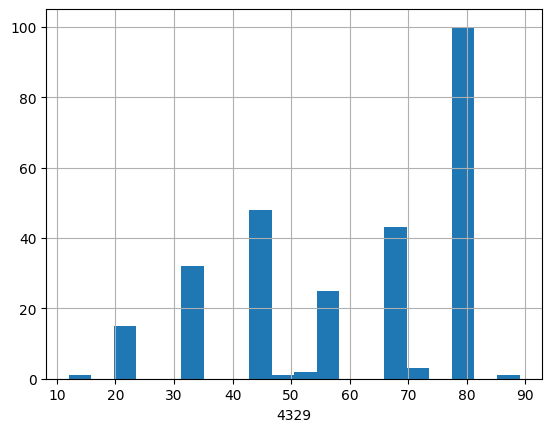

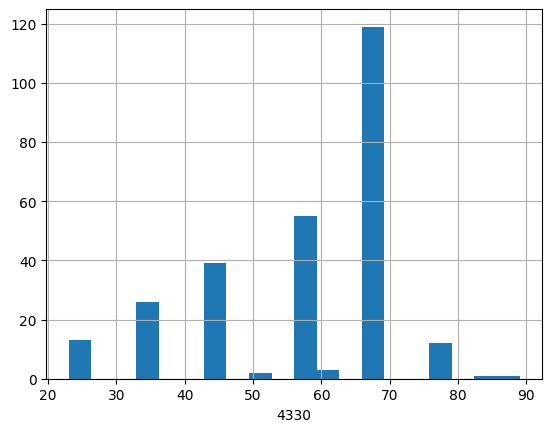

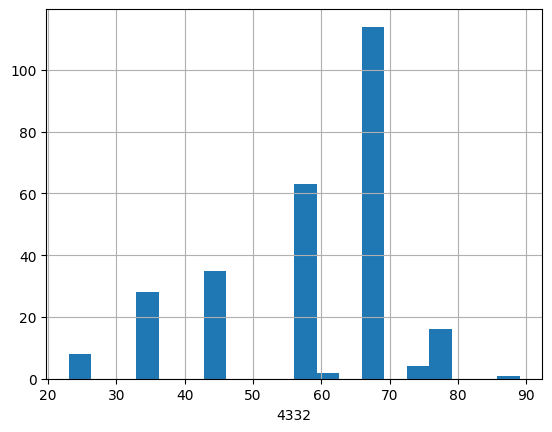

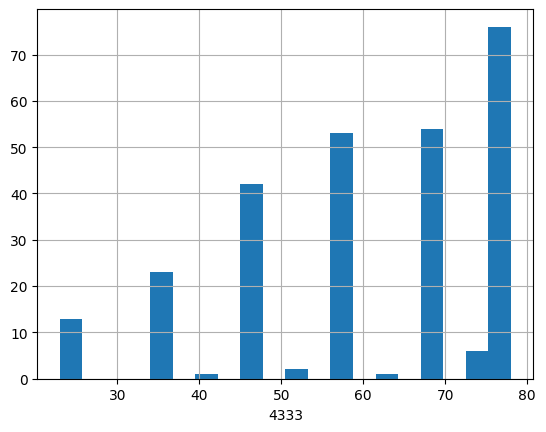

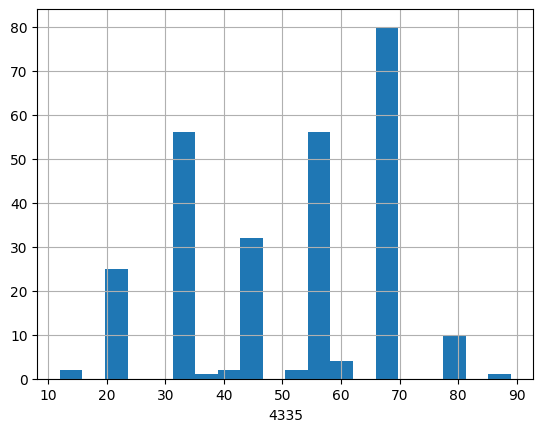

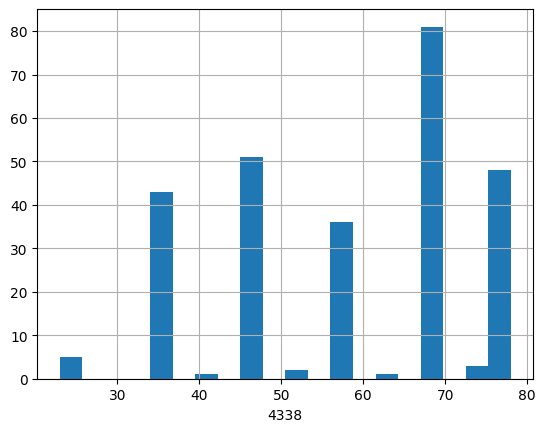

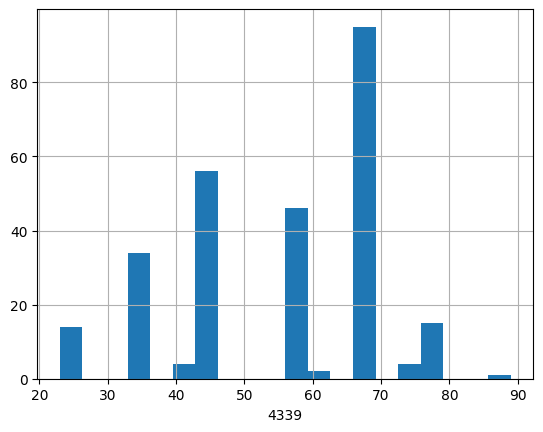

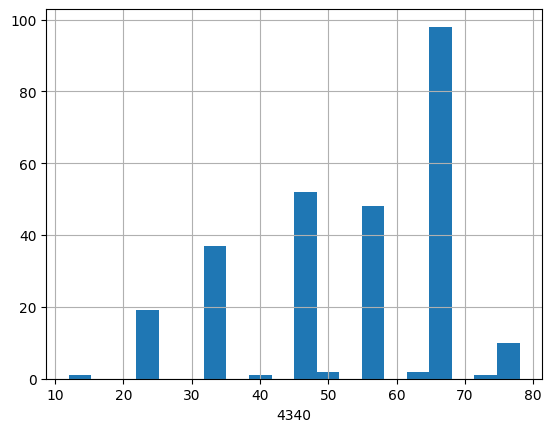

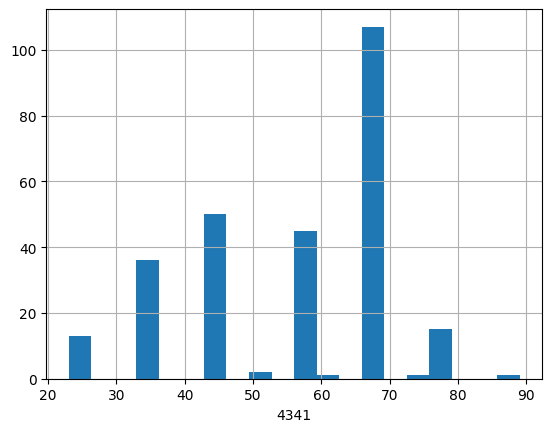

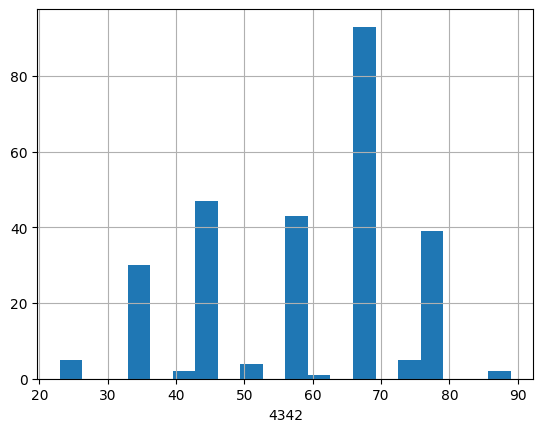

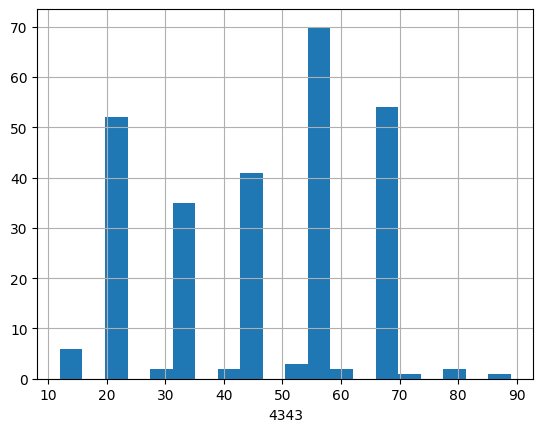

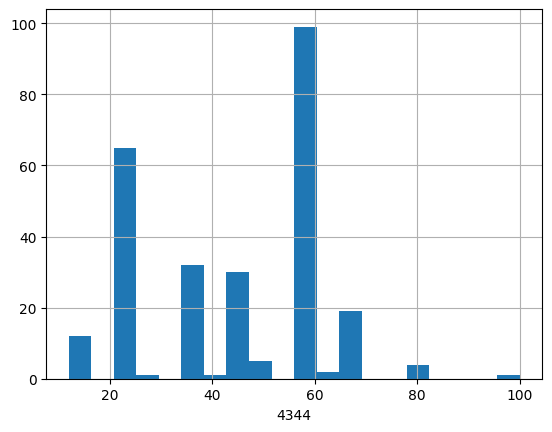

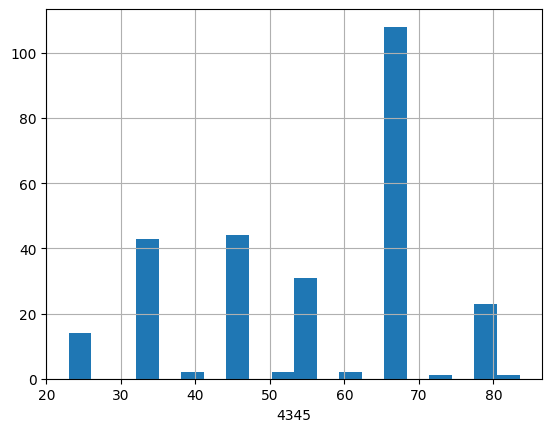

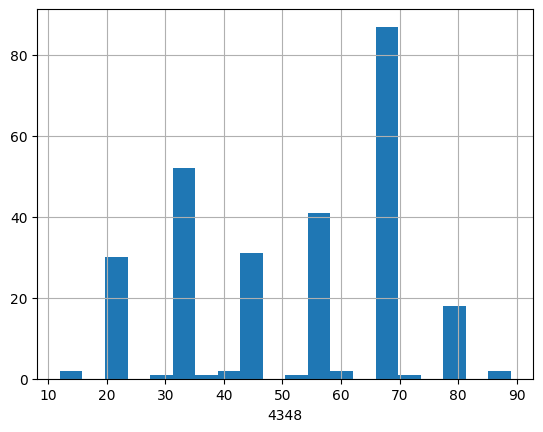

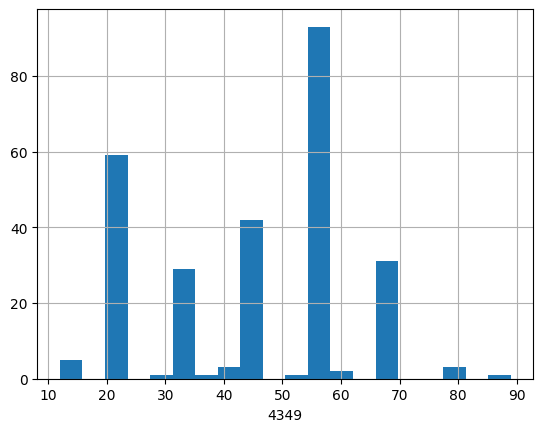

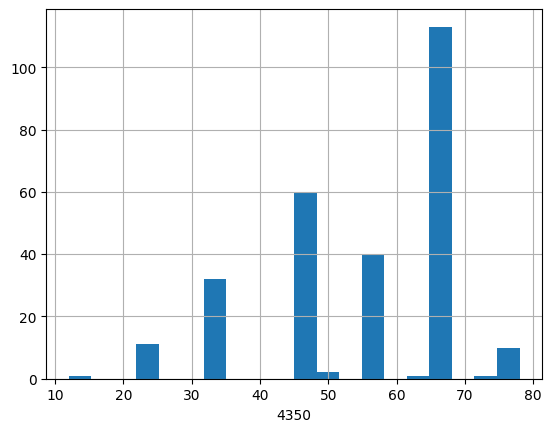

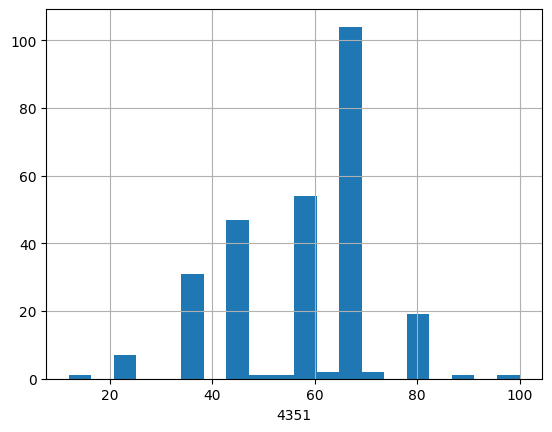

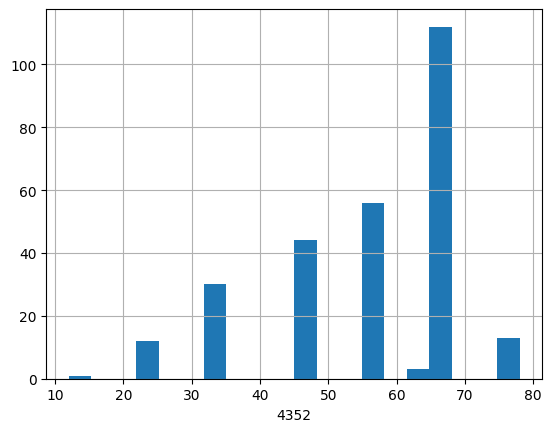

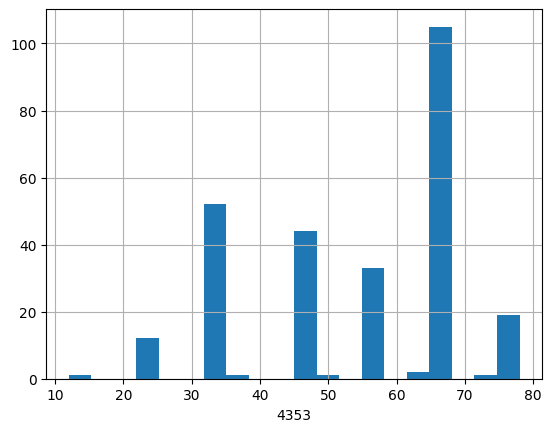

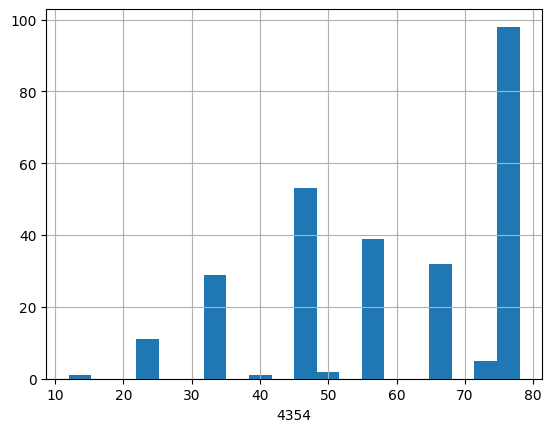

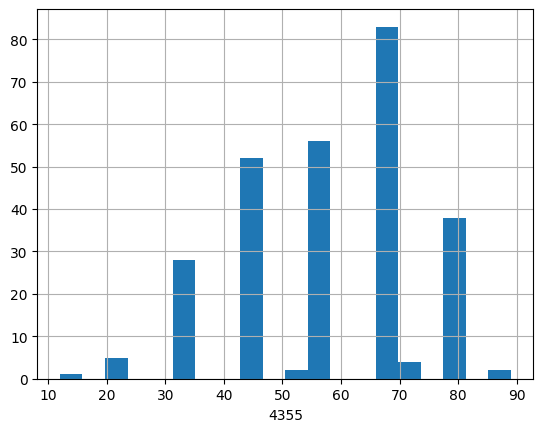

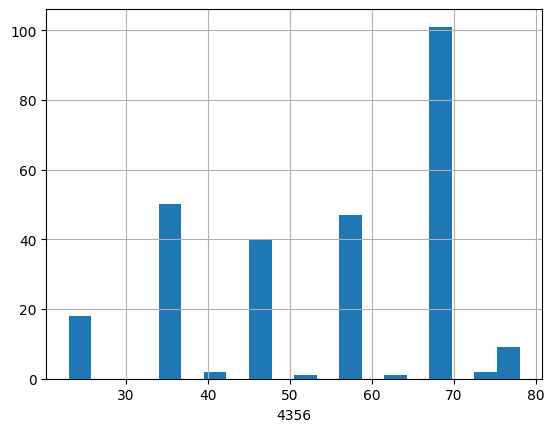

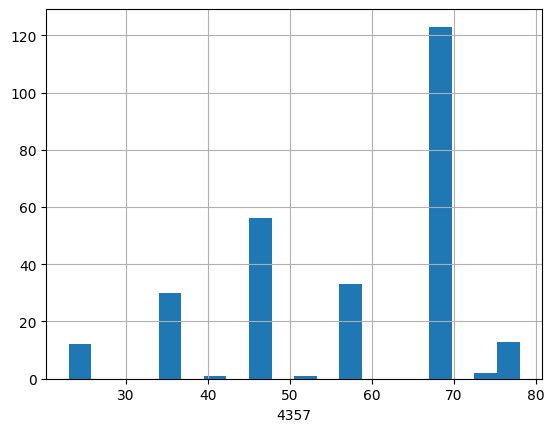

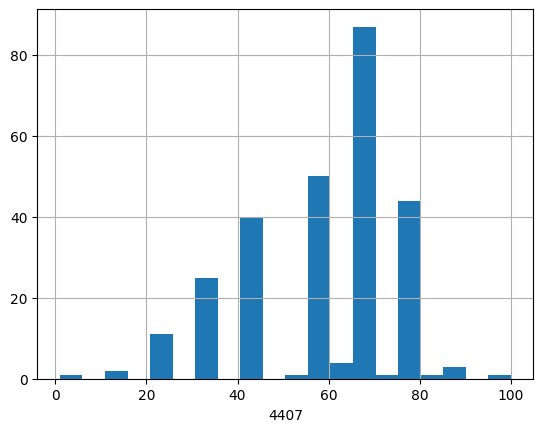

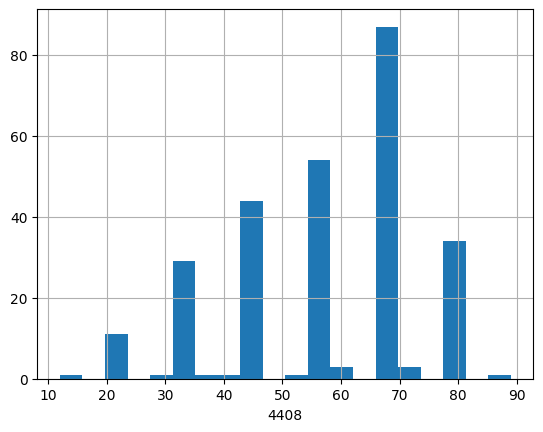

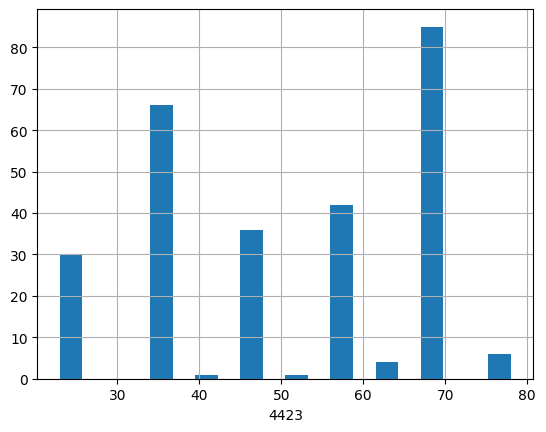

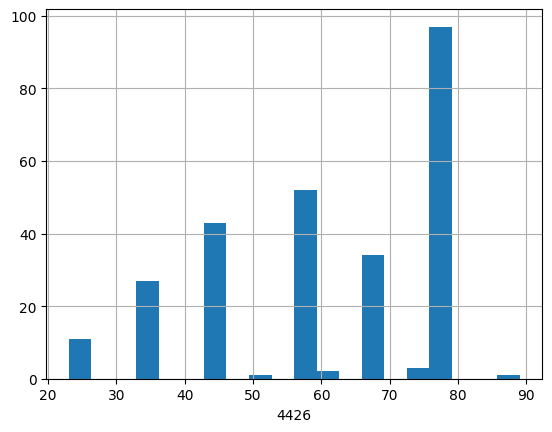

In [31]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)


for col in num_cols:
    plot_numerical_col(pivot_df_reset, col)

## **Model Selection and Prediction**

At this stage, we will choose the best machine learning model for our problem. However, we will not apply any optimization process at this stage. We will apply the optimization process after selecting our model.

Let's start our operations by selecting dependent and independent variables.

In [34]:
y = pivot_df_reset["potential_label"]
X = pivot_df_reset.drop(["potential_label"], axis=1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [110]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Now let's include our classifiers and necessary libraries in our code and calculate our **'roc_auc'**, **'f1'**, **'precision'**, **'recall'**, **'accuracy'** metrics.

In [77]:
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


cart_model = DecisionTreeClassifier(random_state=5)
catboost_model = CatBoostClassifier(random_state=5, verbose=False)
gbm_model = GradientBoostingClassifier(random_state=5)
rf_model = RandomForestClassifier(random_state=5)
xgboost_model = XGBClassifier(random_state=5, use_label_encoder=False)

In [83]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(cart_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
print("===== Before Hyperparameter Optimization =====")
print("f1 score: ", cv_results['test_f1'].mean())
print("precision score: ", cv_results['test_precision'].mean())
print("recall score: ", cv_results['test_recall'].mean())
print("accuracy score: ", cv_results['test_accuracy'].mean())
print("roc_auc score: ", cv_results['test_roc_auc'].mean())

===== Before Hyperparameter Optimization =====
f1 score:  0.5646570972886762
precision score:  0.5271428571428571
recall score:  0.611111111111111
accuracy score:  0.7822410147991544
roc_auc score:  0.7215983363042187


In [84]:
cv_results = cross_validate(catboost_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
print("===== Before Hyperparameter Optimization =====")
print("f1 score: ", cv_results['test_f1'].mean())
print("precision score: ", cv_results['test_precision'].mean())
print("recall score: ", cv_results['test_recall'].mean())
print("accuracy score: ", cv_results['test_accuracy'].mean())
print("roc_auc score: ", cv_results['test_roc_auc'].mean())

===== Before Hyperparameter Optimization =====
f1 score:  0.6297058823529411
precision score:  0.9266666666666667
recall score:  0.4866666666666667
accuracy score:  0.8750528541226215
roc_auc score:  0.8652109328579918


In [85]:
cv_results = cross_validate(gbm_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
print("===== Before Hyperparameter Optimization =====")
print("f1 score: ", cv_results['test_f1'].mean())
print("precision score: ", cv_results['test_precision'].mean())
print("recall score: ", cv_results['test_recall'].mean())
print("accuracy score: ", cv_results['test_accuracy'].mean())
print("roc_auc score: ", cv_results['test_roc_auc'].mean())

===== Before Hyperparameter Optimization =====
f1 score:  0.5765187478500172
precision score:  0.6805555555555556
recall score:  0.5044444444444445
accuracy score:  0.8380549682875265
roc_auc score:  0.8246108140225786


In [97]:
cv_results = cross_validate(rf_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
print("===== Before Hyperparameter Optimization =====")
print("f1 score: ", cv_results['test_f1'].mean())
print("precision score: ", cv_results['test_precision'].mean())
print("recall score: ", cv_results['test_recall'].mean())
print("accuracy score: ", cv_results['test_accuracy'].mean())
print("roc_auc score: ", cv_results['test_roc_auc'].mean())

===== Before Hyperparameter Optimization =====
f1 score:  0.6356582633053222
precision score:  0.96
recall score:  0.4866666666666667
accuracy score:  0.8798097251585624
roc_auc score:  0.8828639334521687


In [87]:
cv_results = cross_validate(xgboost_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
print("===== Before Hyperparameter Optimization =====")
print("f1 score: ", cv_results['test_f1'].mean())
print("precision score: ", cv_results['test_precision'].mean())
print("recall score: ", cv_results['test_recall'].mean())
print("accuracy score: ", cv_results['test_accuracy'].mean())
print("roc_auc score: ", cv_results['test_roc_auc'].mean())

===== Before Hyperparameter Optimization =====
f1 score:  0.607936507936508
precision score:  0.6699999999999999
recall score:  0.5666666666666667
accuracy score:  0.8427061310782241
roc_auc score:  0.82243018419489


## **Model Evaluation**

In this section, we will examine the success of our optimize Random Forests model. Then we will create the Confusion matrix. We will examine error metrics.

Let's continue our operations by applying **hyperparameter optimization** on our Catboost and RandomForests classifiers.

Hyperparameter optimization is the process of selecting the most appropriate hyperparameters to maximize the performance of a machine learning model. Hyperparameters are parameters that control the configuration of a model and must be set before the model is trained.

Hyperparameter optimization aims to find the right combination of hyperparameters to improve model performance.

With the **RandomSearchCV()** method, a wide parameter range can be given and a subset can be obtained from there, and then with the **GridSearchCV()** method, all combinations of this subset can be tried to find the best parameters. However, we will only apply the **GridSearchCV()** method here.



In [ ]:
from sklearn.model_selection import GridSearchCV
rf_params = {"max_depth": [3, 5, 8, 10],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True)
rf_best_grid.fit(X_train, y_train)
rf_final = RandomForestClassifier(**rf_best_grid.best_params_, random_state=42)
rf_final.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Let's re-examine the cross validation results of our models after hyperparameter optimization.

In [100]:
cv_results = cross_validate(rf_final, X_train, y_train, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
print("===== After Hyperparameter Optimization =====")
print("f1 score: ", cv_results['test_f1'].mean())
print("precision score: ", cv_results['test_precision'].mean())
print("recall score: ", cv_results['test_recall'].mean())
print("accuracy score: ", cv_results['test_accuracy'].mean())
print("roc_auc score: ", cv_results['test_roc_auc'].mean())

===== After Hyperparameter Optimization =====
f1 score:  0.6165079365079366
precision score:  0.9466666666666667
recall score:  0.48999999999999994
accuracy score:  0.8757575757575757
roc_auc score:  0.8913970588235294


Now, let's plot the ranking of the features using the **feature_importance** function, which indicates the importance level of the variables for these two classifiers.

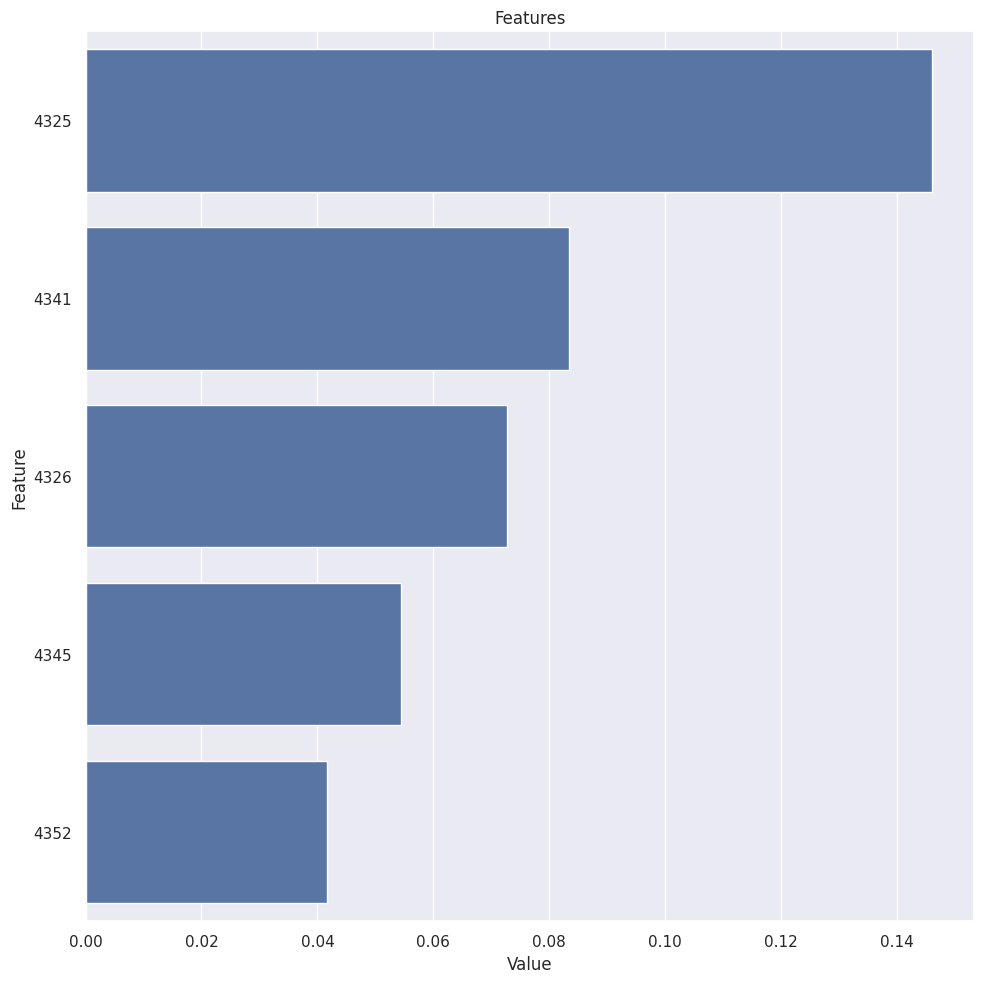

In [104]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])

    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_final, X, num=5)

Now let's perform the prediction process and create a **Confusion matrix**. Let's include the libraries we need for this and write our function.

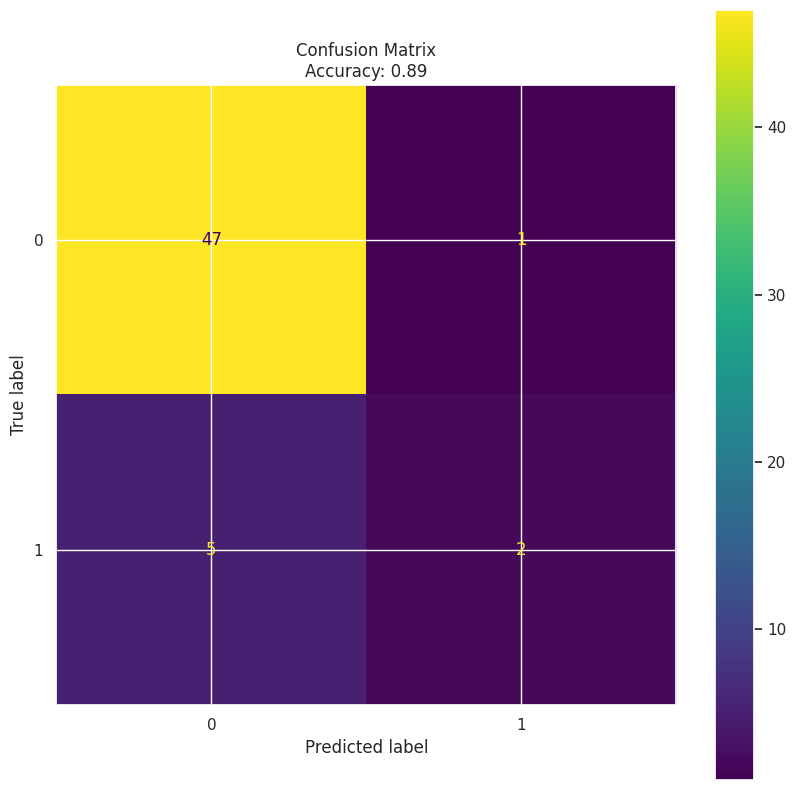

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = rf_final.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(ax=ax)

plt.title(f"Confusion Matrix\nAccuracy: {accuracy:.2f}")
plt.show()